In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [ ]:
df['route'].nunique()

799

In [ ]:
df_encoded = pd.get_dummies(df, columns=['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin'])
df_encoded.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,2,262,19,7,1,0,0,5.52,0,True,...,False,False,False,False,False,False,False,False,False,False
1,1,112,20,3,0,0,0,5.52,0,True,...,False,False,False,False,False,False,False,False,False,False
2,2,243,22,17,1,1,0,5.52,0,True,...,False,False,False,False,False,False,False,False,False,False
3,1,96,31,4,0,0,1,5.52,0,True,...,False,False,False,False,False,False,False,False,False,False
4,2,68,22,15,1,0,1,5.52,0,True,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
scaler = StandardScaler()
df_encoded[['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']] = scaler.fit_transform(df_encoded[['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']])
df_encoded.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Internet,...,booking_origin_Timor-Leste,booking_origin_Tonga,booking_origin_Tunisia,booking_origin_Turkey,booking_origin_Ukraine,booking_origin_United Arab Emirates,booking_origin_United Kingdom,booking_origin_United States,booking_origin_Vanuatu,booking_origin_Vietnam
0,0.400684,1.957530,-0.119353,-0.381764,1,0,0,-1.174175,0,True,...,False,False,False,False,False,False,False,False,False,False
1,-0.579559,0.299164,-0.089844,-1.120780,0,0,0,-1.174175,0,True,...,False,False,False,False,False,False,False,False,False,False
2,0.400684,1.747470,-0.030824,1.465775,1,1,0,-1.174175,0,True,...,False,False,False,False,False,False,False,False,False,False
3,-0.579559,0.122272,0.234761,-0.936026,0,0,1,-1.174175,0,True,...,False,False,False,False,False,False,False,False,False,False
4,0.400684,-0.187290,-0.030824,1.096267,1,0,1,-1.174175,0,True,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
X = df_encoded.drop('booking_complete', axis=1)  # features
y = df_encoded['booking_complete']  # target variable

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=500, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=42)

In [ ]:
# Evaluate the model
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8548
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.54      0.13      0.21      1480

    accuracy                           0.85     10000
   macro avg       0.70      0.55      0.56     10000
weighted avg       0.82      0.85      0.81     10000



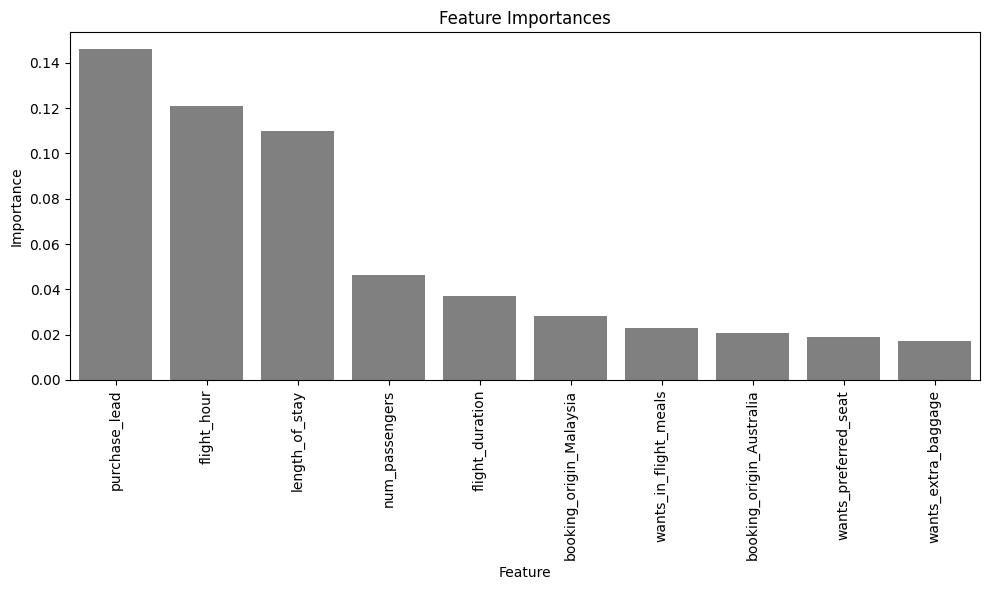

In [ ]:
# Get the feature importances from the random forest model
feature_importances = rf_model.feature_importances_

# Create a dataframe with the feature names and importances
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the dataframe by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Create a bar plot of the top 10 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Importance', data=feature_importances_df.head(10),color='gray')
plt.title('Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()